<img src="assets/bricks.jpg">

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. 

# Import Statements

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [5]:
colors = pd.read_csv('data/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [35]:
colors["name"].nunique()

217

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [36]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,179,179,179
t,38,38,38


In [37]:
colors.is_trans.value_counts()

f    179
t     38
Name: is_trans, dtype: int64

<h3>Understanding LEGO Themes vs. LEGO Sets<h3>


Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src='assets/lego_themes.png'>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

<img src='assets/lego_sets.png'>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [38]:
sets = pd.read_csv('data/sets.csv')

In [39]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [40]:
sets.tail()

,set_num,name,year,theme_id,num_parts,img_url
20400,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...
20401,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...
20402,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,https://cdn.rebrickable.com/media/sets/yodachr...
20403,YTERRIER-1,Yorkshire Terrier,2018,598,0,https://cdn.rebrickable.com/media/sets/yterrie...
20404,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0,https://cdn.rebrickable.com/media/sets/zx8000-...


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [41]:
first_legos = sets.year.sort_values(ascending=True).head()
sets[sets.year.isin(first_legos)]

,set_num,name,year,theme_id,num_parts,img_url
12415,700.1-1,Extra-Large Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.1-1...
12428,700.2-1,Large Gift Set (ABB),1949,365,178,https://cdn.rebrickable.com/media/sets/700.2-1...
12433,700.3-1,Medium Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.3-1...
12438,700.A-1,Small Brick Set (ABB),1949,371,24,https://cdn.rebrickable.com/media/sets/700.a-1...
12439,700.B-1,Small Doors and Windows Set (ABB),1949,371,12,https://cdn.rebrickable.com/media/sets/700.b-1...


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [42]:
sets[sets["year"] == 1949]

,set_num,name,year,theme_id,num_parts,img_url
12415,700.1-1,Extra-Large Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.1-1...
12428,700.2-1,Large Gift Set (ABB),1949,365,178,https://cdn.rebrickable.com/media/sets/700.2-1...
12433,700.3-1,Medium Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.3-1...
12438,700.A-1,Small Brick Set (ABB),1949,371,24,https://cdn.rebrickable.com/media/sets/700.a-1...
12439,700.B-1,Small Doors and Windows Set (ABB),1949,371,12,https://cdn.rebrickable.com/media/sets/700.b-1...


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [43]:
most_numberofparts = sets.num_parts.sort_values(ascending=False).head()
sets[sets.num_parts.isin(most_numberofparts)]

,set_num,name,year,theme_id,num_parts,img_url
350,10276-1,Colosseum,2020,721,9036,https://cdn.rebrickable.com/media/sets/10276-1...
369,10294-1,Titanic,2021,721,9092,https://cdn.rebrickable.com/media/sets/10294-1...
384,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...
4160,31203-1,World Map,2021,709,11695,https://cdn.rebrickable.com/media/sets/31203-1...
19274,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987,https://cdn.rebrickable.com/media/sets/bigbox-...


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [44]:
sets_by_year = sets.groupby('year').count()

In [45]:
sets_by_year.head()

,set_num,name,theme_id,num_parts,img_url
year,,,,,
1949,5,5,5,5,5
1950,6,6,6,6,6
1953,4,4,4,4,4
1954,14,14,14,14,14
1955,37,37,37,37,37


In [46]:
sets_by_year.tail()

,set_num,name,theme_id,num_parts,img_url
year,,,,,
2019,976,976,976,976,976
2020,992,992,992,992,992
2021,1102,1102,1102,1102,1102
2022,942,942,942,942,942
2023,170,170,170,170,170


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

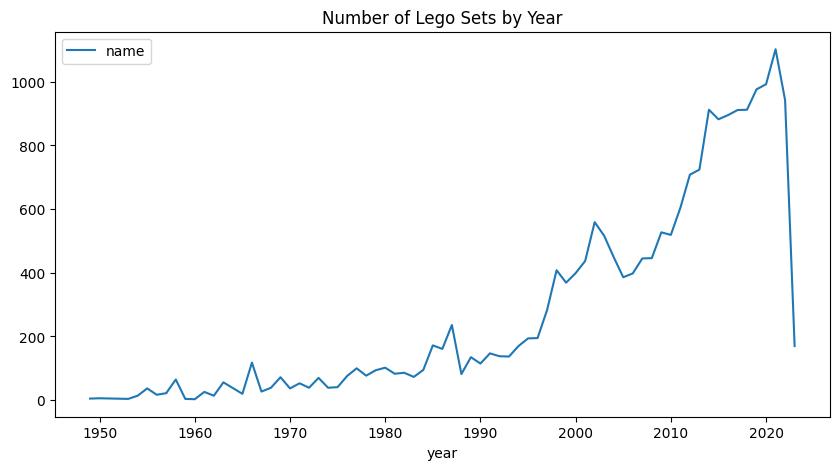

In [47]:
sets_plot = sets_by_year.plot(y='name', figsize=(10,5), title="Number of Lego Sets by Year")

2023 is misleading because it has limited data since 170 sets is planned to be released but not released yet.


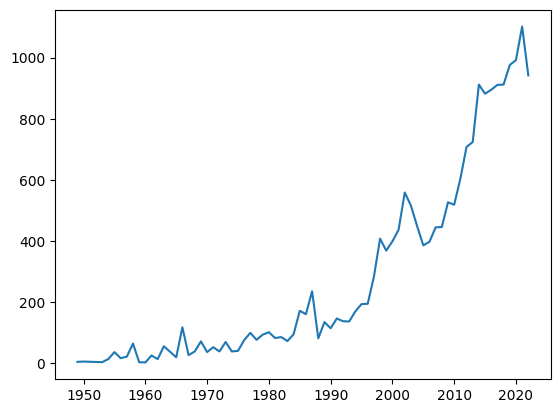

In [50]:
x = sets_by_year.iloc[:-1].index
y = sets_by_year.iloc[:-1].name

plt.plot(x, y);

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [52]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})

In [54]:
themes_by_year.rename(columns={'theme_id': 'number_of_themes'}, inplace=True)
themes_by_year.head()

,number_of_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,5


In [55]:
themes_by_year.tail()

,number_of_themes
year,
2019,93
2020,99
2021,87
2022,81
2023,25


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2022 and 2023). 

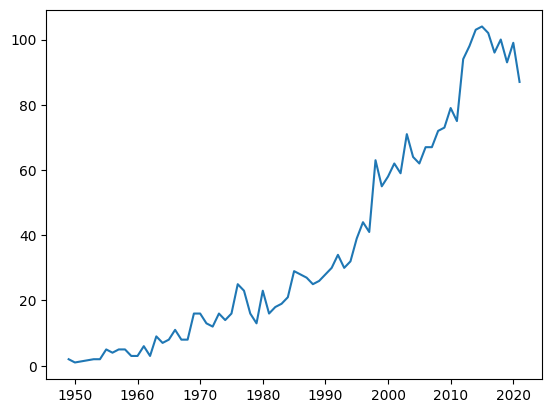

In [60]:
x = themes_by_year.iloc[:-2].index
y = themes_by_year.iloc[:-2].number_of_themes

plt.plot(x, y);

### Line Charts with Two Seperate Axes

</h2>Superimposing Line Charts with Separate Axes</h2>


C:\Users\basak\AppData\Local\Temp\ipykernel_536\402811097.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(themes_by_year.index[:-2], themes_by_year.number_of_themes[:-2]);
C:\Users\basak\AppData\Local\Temp\ipykernel_536\402811097.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(sets_by_year.index[:-2], sets_by_year.name[:-2]);


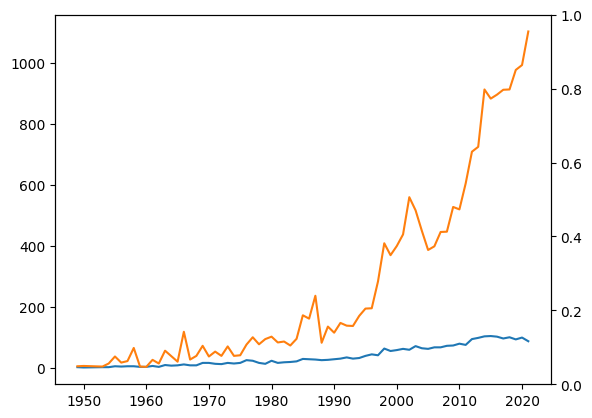

In [66]:
plt.plot(themes_by_year.index[:-2], themes_by_year.number_of_themes[:-2]);
plt.plot(sets_by_year.index[:-2], sets_by_year.name[:-2]);


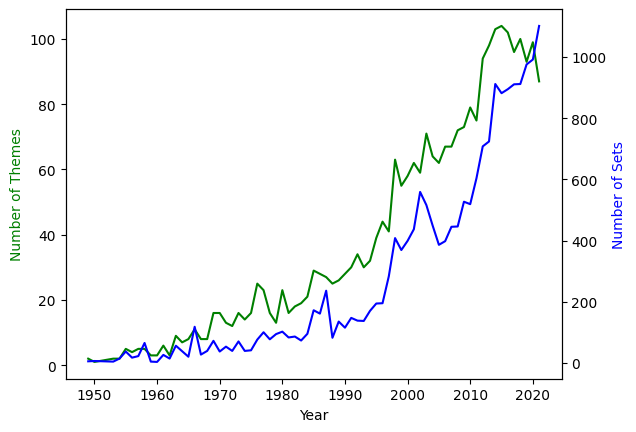

In [87]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

ax1.plot(themes_by_year.iloc[:-2].index, themes_by_year.iloc[:-2].number_of_themes, 'g-')
ax2.plot(sets_by_year.iloc[:-2].index, sets_by_year.iloc[:-2].name, 'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Themes', color='g')
ax2.set_ylabel('Number of Sets', color='b');



**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [72]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

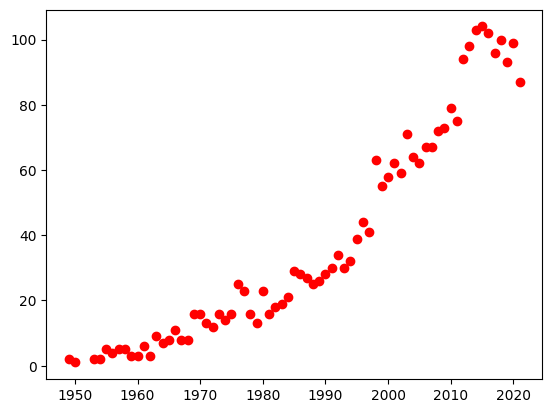

In [81]:
x = parts_per_set.iloc[:-2].index
y1 = parts_per_set.iloc[:-2].num_parts

plt.scatter(x, y, color='red');

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

<img src="assets/rebrickable_schema.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [88]:
themes = pd.read_csv('data/themes.csv')

In [89]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [90]:
themes.loc[themes.name == 'Star Wars']

,id,name,parent_id
5,18,Star Wars,1.0
75,158,Star Wars,NaN
96,209,Star Wars,207.0
126,261,Star Wars,258.0


In [98]:
sets.loc[sets.theme_id == 18]


,set_num,name,year,theme_id,num_parts,img_url
11599,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1,https://cdn.rebrickable.com/media/sets/65081-1...
15411,8000-1,Pit Droid,2000,18,223,https://cdn.rebrickable.com/media/sets/8000-1.jpg
15418,8001-1,Battle Droid,2000,18,336,https://cdn.rebrickable.com/media/sets/8001-1.jpg
15429,8002-1,Destroyer Droid,2000,18,567,https://cdn.rebrickable.com/media/sets/8002-1.jpg
15456,8007-1,C-3PO,2001,18,339,https://cdn.rebrickable.com/media/sets/8007-1.jpg
15457,8008-1,Stormtrooper,2001,18,361,https://cdn.rebrickable.com/media/sets/8008-1.jpg
15458,8009-1,R2-D2,2002,18,239,https://cdn.rebrickable.com/media/sets/8009-1.jpg
15459,8010-1,Darth Vader,2002,18,388,https://cdn.rebrickable.com/media/sets/8010-1.jpg
15471,8011-1,Jango Fett,2002,18,425,https://cdn.rebrickable.com/media/sets/8011-1.jpg
15474,8012-1,Super Battle Droid,2002,18,378,https://cdn.rebrickable.com/media/sets/8012-1.jpg


In [99]:
sets.loc[sets.theme_id == 158]

,set_num,name,year,theme_id,num_parts,img_url
2041,20006-1,Clone Turbo Tank,2008,158,64,https://cdn.rebrickable.com/media/sets/20006-1...
2052,20007-1,Republic Attack Cruiser,2009,158,84,https://cdn.rebrickable.com/media/sets/20007-1...
2065,20009-1,AT-TE Walker,2009,158,94,https://cdn.rebrickable.com/media/sets/20009-1...
2067,20010-1,Republic Gunship,2009,158,94,https://cdn.rebrickable.com/media/sets/20010-1...
2074,20016-1,Imperial Shuttle,2010,158,70,https://cdn.rebrickable.com/media/sets/20016-1...
...,...,...,...,...,...,...
20364,VP-4,Star Wars Co-Pack,2000,158,0,https://cdn.rebrickable.com/media/sets/vp-4.jpg
20367,VP-8,Star Wars Co-Pack,2000,158,0,https://cdn.rebrickable.com/media/sets/vp-8.jpg
20400,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...
20401,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...


### Merging (i.e., Combining) DataFrames based on a Key


In [100]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

C:\Users\basak\AppData\Local\Temp\ipykernel_536\1682824402.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  set_theme_count[:5]


158    848
503    674
497    558
494    521
435    464
Name: theme_id, dtype: int64

In [101]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index,
                                'set_count': set_theme_count.values})

set_theme_count.head()

,id,set_count
0,158,848
1,503,674
2,497,558
3,494,521
4,435,464


In [102]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,848,Star Wars,NaN
1,503,674,Key Chain,501.0
2,497,558,Books,NaN


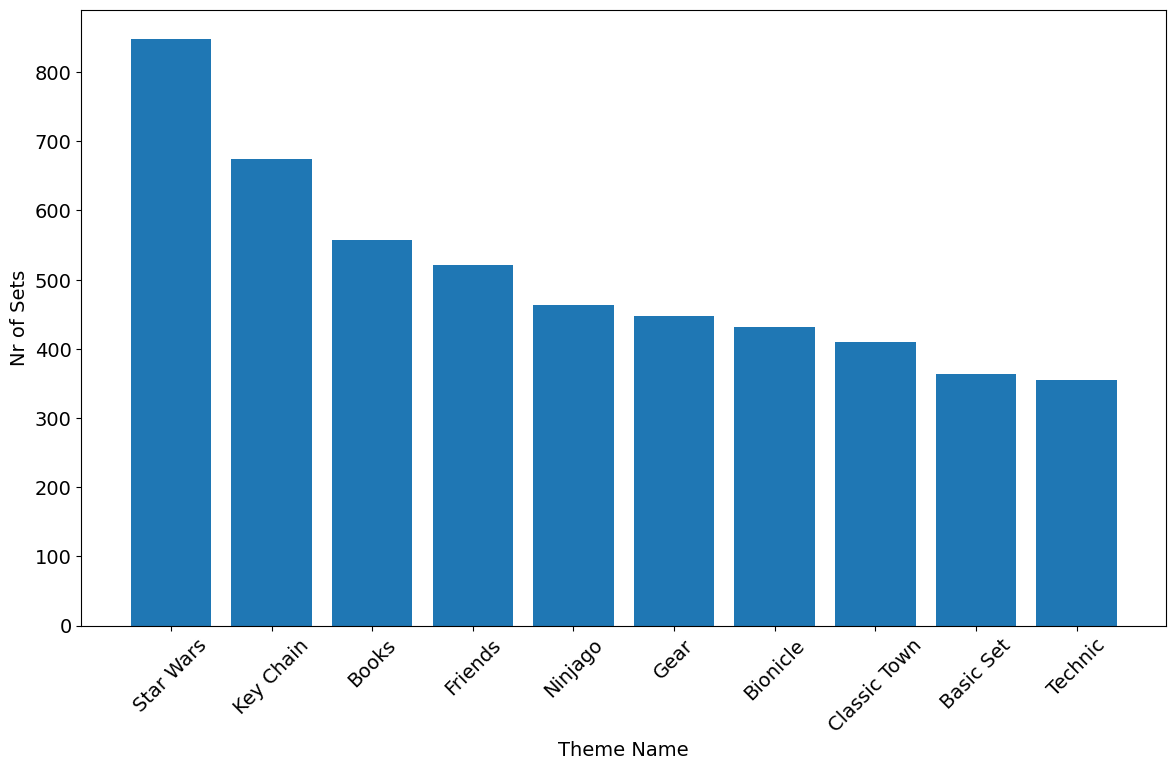

In [106]:

plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:10], merged_df.set_count[:10]);